<a href="https://colab.research.google.com/github/AswiniSivadasan/DSA_Assignments/blob/main/Aswini_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
#to find the shape of dataset
data.shape

(112, 2)

In [ ]:
#to find the coulmn names of dataset
data.columns

Index(['Year', 'Price'], dtype='object')

In [ ]:
#to find information regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
#to find the statistics of dataset
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
#to find  whether there is null values
data.isnull()

,Year,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
107,False,False
108,False,False
109,False,False
110,False,False


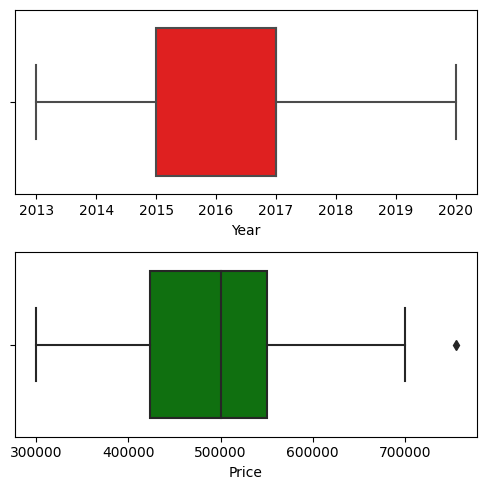

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(x=data['Year'], ax = axs[0],color='r')
plt2 = sns.boxplot(x=data['Price'], ax = axs[1],color='g')
plt.tight_layout()

In [ ]:
# Split the data into features (year) and target (price)
X = data[['Year']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict the price for a 2022 model
year_2022 = np.array([[2022]])
predicted_price_lr = lr_model.predict(year_2022)

print("Linear Regression Predicted Price for 2022 model:", predicted_price_lr[0])


Linear Regression Predicted Price for 2022 model: 743601.6159450412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Predict the price for a 2022 model
predicted_price_lasso = lasso_model.predict(year_2022)

print("Lasso Regression Predicted Price for 2022 model:", predicted_price_lasso[0])


Lasso Regression Predicted Price for 2022 model: 743599.3742714375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate Linear Regression model
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Lasso Regression model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2 Score:", r2_lr)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R2 Score:", r2_lasso)


Linear Regression MSE: 4326906256.829671
Linear Regression R2 Score: 0.36759313425902185
Lasso Regression MSE: 4326859771.015669
Lasso Regression R2 Score: 0.3675999284778446


Therefore based on this inferencing that Lasso Regression is performing better.
